In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import seaborn as sns
import math
import time

df = pd.read_csv('StudentsPerformance.csv') # Training set is already available
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [3]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [4]:
df_encoded = df.copy() 

# Calculate mean score for each row
df_encoded["mean score"] = (df_encoded["math score"] + 
                           df_encoded["reading score"] + 
                           df_encoded["writing score"]) / 3

df_encoded["std score"] = np.sqrt(
    ((df_encoded["math score"] - df_encoded["mean score"])**2 + 
     (df_encoded["reading score"] - df_encoded["mean score"])**2 + 
     (df_encoded["writing score"] - df_encoded["mean score"])**2) / 3
)

df_encoded.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score,std score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,0.942809
1,female,group C,some college,standard,completed,69,90,88,82.333333,9.463380
2,female,group B,master's degree,standard,none,90,95,93,92.666667,2.054805
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,5.557777
4,male,group C,some college,standard,none,76,78,75,76.333333,1.247219


In [5]:
df_encoded = pd.get_dummies(df_encoded, dtype=int)
df_encoded.head()

,math score,reading score,writing score,mean score,std score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,...,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,72.666667,0.942809,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
1,69,90,88,82.333333,9.463380,1,0,0,0,1,...,0,0,0,0,1,0,0,1,1,0
2,90,95,93,92.666667,2.054805,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
3,47,57,44,49.333333,5.557777,0,1,1,0,0,...,1,0,0,0,0,0,1,0,0,1
4,76,78,75,76.333333,1.247219,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,1


       math score  reading score  writing score   mean score    std score  \
count  1000.00000    1000.000000    1000.000000  1000.000000  1000.000000   
mean     66.08900      69.169000      68.054000    67.770667     4.212882   
std      15.16308      14.600192      15.195657    14.257326     2.291188   
min       0.00000      17.000000      10.000000     9.000000     0.000000   
25%      57.00000      59.000000      57.750000    58.333333     2.494438   
50%      66.00000      70.000000      69.000000    68.333333     3.858612   
75%      77.00000      79.000000      79.000000    77.666667     5.715476   
max     100.00000     100.000000     100.000000   100.000000    12.552114   

       gender_female  gender_male  race/ethnicity_group A  \
count    1000.000000  1000.000000             1000.000000   
mean        0.518000     0.482000                0.089000   
std         0.499926     0.499926                0.284886   
min         0.000000     0.000000                0.000000   
2

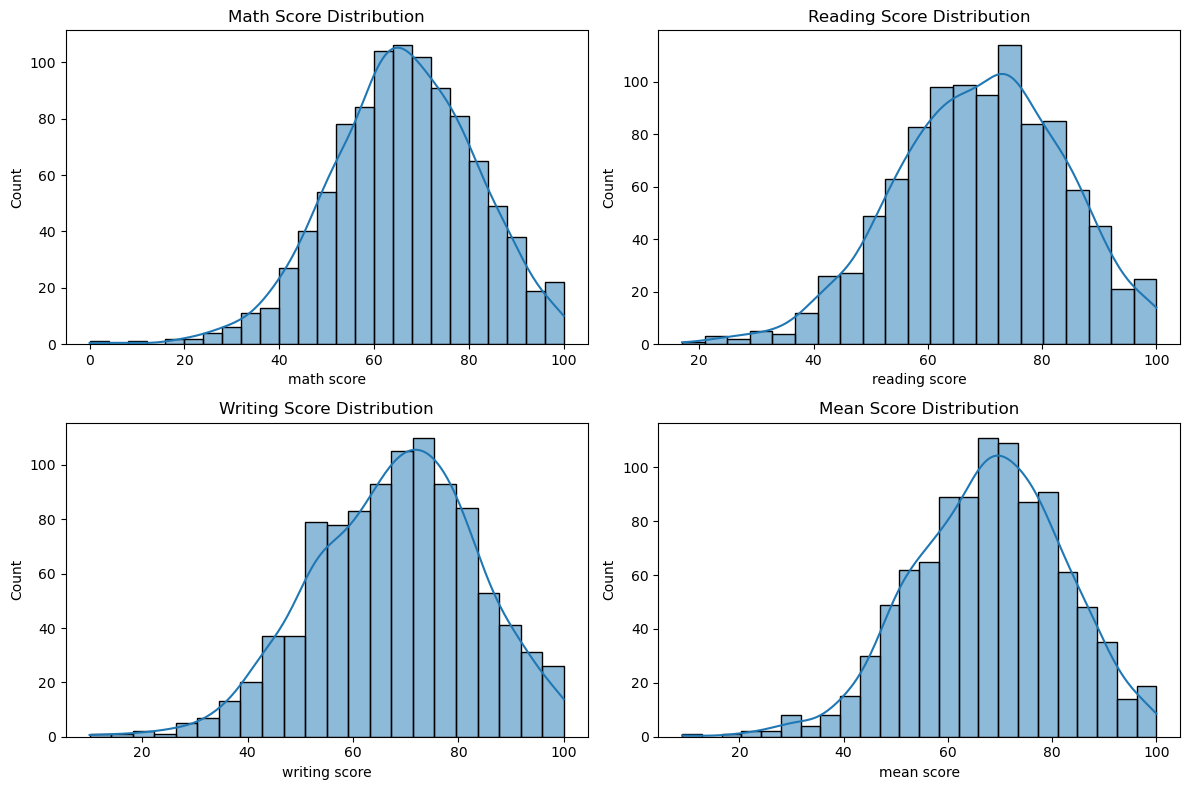

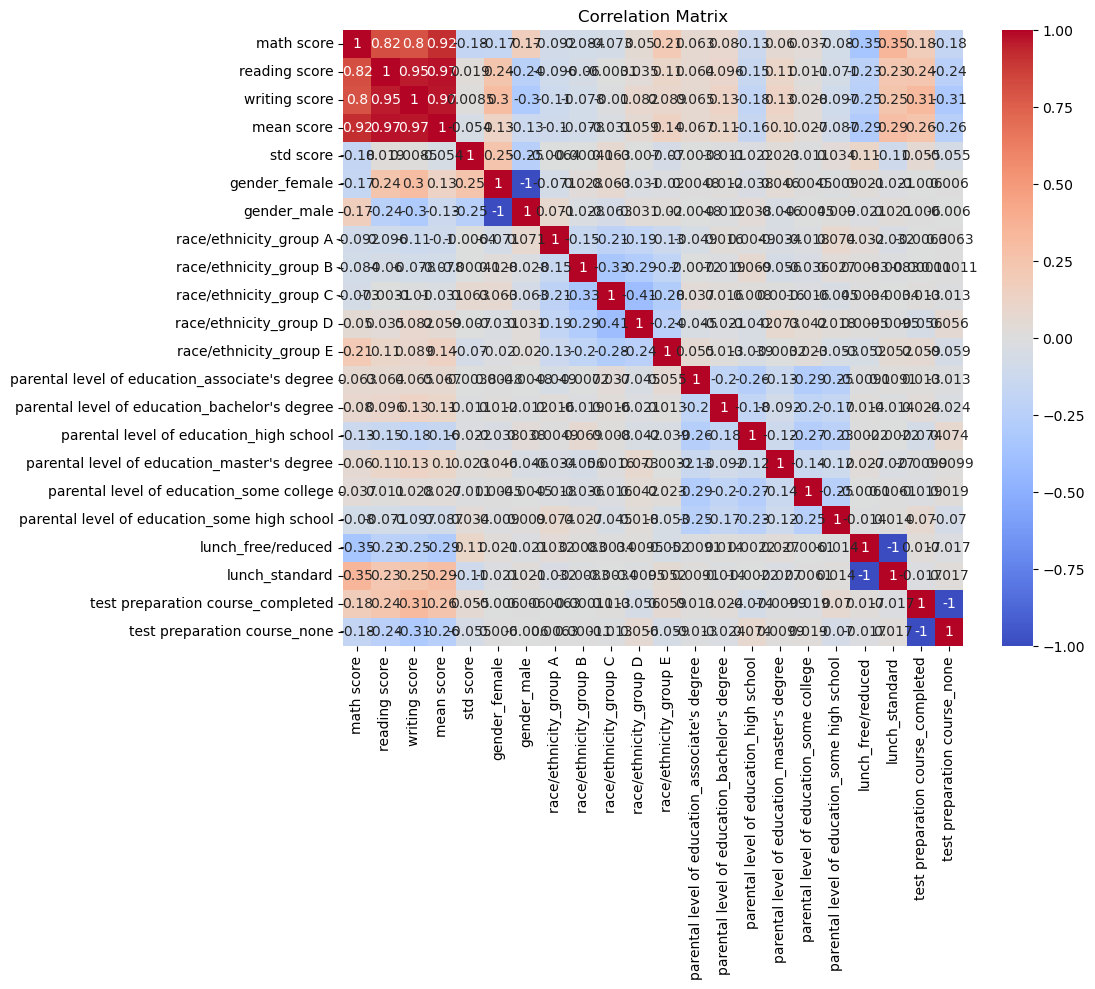

In [6]:
# Basic statistics
print(df_encoded.describe())

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(df_encoded["math score"], kde=True)
plt.title("Math Score Distribution")

plt.subplot(2, 2, 2)
sns.histplot(df_encoded["reading score"], kde=True)
plt.title("Reading Score Distribution")

plt.subplot(2, 2, 3)
sns.histplot(df_encoded["writing score"], kde=True)
plt.title("Writing Score Distribution")

plt.subplot(2, 2, 4)
sns.histplot(df_encoded["mean score"], kde=True)
plt.title("Mean Score Distribution")

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [7]:
X = df_encoded.drop(["math score", "reading score", "writing score", "mean score", "std score"], axis='columns')
y = df_encoded['mean score']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [15]:
param_dist_svr = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
    'epsilon': [0.1, 0.2, 0.3],
    'degree': [2, 3]
}

random_search_svr = RandomizedSearchCV(
    SVR(),
    param_dist_svr,
    n_iter=100,
    cv=5,
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

random_search_svr.fit(X_train, y_train)

print("\nMillors hiperparàmetres trobats amb Random Search per SVR:")
print(random_search_svr.best_params_)
print(f"Millor puntuació de validació (MSE): {random_search_svr.best_score_:.4f}")

y_pred = random_search_svr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse)
print(mae)
print(r2)

Fitting 5 folds for each of 100 candidates, totalling 500 fits

Millors hiperparàmetres trobats amb Random Search per SVR:
{'kernel': 'linear', 'gamma': 0.1, 'epsilon': 0.3, 'degree': 2, 'C': 1}
Millor puntuació de validació (MSE): -10.1091
180.83183258277168
10.480330853762064
0.15643640053274022
